In [1]:
import pandas as pd
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


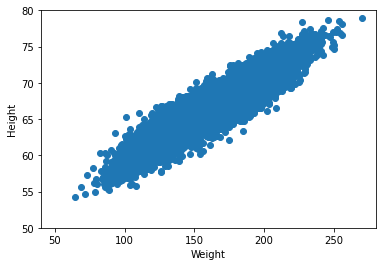

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

plt.xlim(40, 280)
plt.ylim(50, 80)
plt.show()

In [3]:
female = df['Gender'] == 'Female'
female_df = df[female]
female_df


,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
male = df['Gender'] == 'Male'
male_df = df[male]
male_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


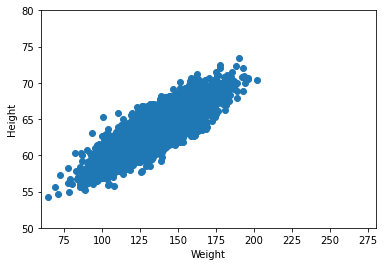

In [5]:
plt.scatter(female_df['Weight'], female_df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

plt.xlim(60, 280)
plt.ylim(50, 80)
plt.show()

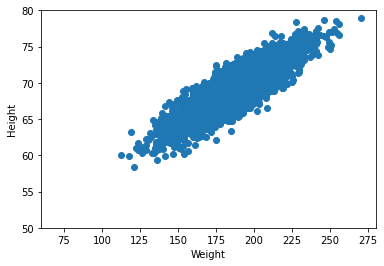

In [6]:
plt.scatter(male_df['Weight'], male_df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.xlim(60, 280)
plt.ylim(50, 80)
plt.show()

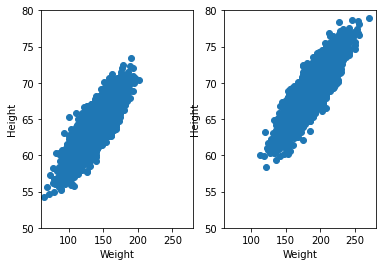

In [7]:
plt.subplot(1, 2, 1)
plt.scatter(female_df['Weight'], female_df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

plt.xlim(60, 280)
plt.ylim(50, 80)

plt.subplot(1, 2, 2)
plt.scatter(male_df['Weight'], male_df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.xlim(60, 280)
plt.ylim(50, 80)
plt.show()


In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

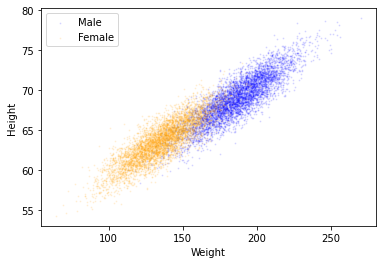

In [9]:

colour_dict = {'Female': 'orange', 'Male': 'blue'}

for gender in df.Gender.unique():
    gendered_df = df[df['Gender'] == gender]
    plt.scatter(gendered_df['Weight'], gendered_df['Height'],
               c=colour_dict[gender], label=gender,alpha=0.1,s=1)
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()
#plt.scatter(... c = Orange | Female .. Blue )

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df.iloc[:,1:])

KMeans(n_clusters=4, random_state=0)

In [11]:
df.iloc[:,1:]

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [12]:
kmeans.labels_

array([2, 0, 2, ..., 3, 0, 3], dtype=int32)

In [13]:
kmeans.cluster_centers_

array([[ 67.88268971, 176.3922386 ],
       [ 64.69747718, 145.60465606],
       [ 71.29471045, 205.25991462],
       [ 61.53849116, 117.81509085]])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.iloc[:, 1:])
scaled_df= scaler.transform(df.iloc[:, 1:])

In [15]:
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [16]:
kmeans.cluster_centers_

array([[ 0.43343325,  0.51186155],
       [-1.34423273, -1.3264716 ],
       [-0.41570011, -0.48167984],
       [ 1.40659119,  1.37028626]])

In [18]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[ 68.03512299, 177.87461039],
       [ 61.19584511, 118.85155405],
       [ 64.76822187, 145.9751423 ],
       [ 71.77918832, 205.43590954]])